In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import ast
import itertools
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=pd.errors.DtypeWarning)

#### Transaction Delay

In [ ]:
# Load the first dataset
file_path1 = "simulation_results_validation_0606/baseline_b5_s5_r5_v2_uniform_start_seed_20_20250622_113308/transactions.csv"
transactions1 = pd.read_csv(file_path1)
transactions1 = transactions1[transactions1['is_proposed']].copy()
transactions1['proposal_delay'] = transactions1['proposed_time'] - transactions1['arrival_time']
transactions1['sanctioned_type'] = transactions1['sanctioned_type'].map({0: 'Non-sanctioned (0)', 1: 'Sanctioned (1)'})
transactions1['experiment'] = 'b5_s5_r5_v2_seed_20'

# Load the second dataset
file_path2 = "simulation_results_validation_0606/baseline_b5_s5_r5_v2_uniform_start_seed_30_20250622_114252/transactions.csv"
transactions2 = pd.read_csv(file_path2)
transactions2 = transactions2[transactions2['is_proposed']].copy()
transactions2['proposal_delay'] = transactions2['proposed_time'] - transactions2['arrival_time']
transactions2['sanctioned_type'] = transactions2['sanctioned_type'].map({0: 'Non-sanctioned (0)', 1: 'Sanctioned (1)'})
transactions2['experiment'] = 'b5_s5_r5_v2_seed_30'

# Combine the two datasets
combined_transactions = pd.concat([transactions1, transactions2], ignore_index=True)

# Check for negative proposal delays
negative_delay_txs = combined_transactions[combined_transactions['proposal_delay'] < 0]
print("Transactions with negative proposal delay:")
print(negative_delay_txs)

# Average within each run first, then average across runs
# Step 1: Compute mean and standard deviation for each run, experiment, and sanctioned type
run_stats = combined_transactions.groupby(['experiment', 'run_id', 'sanctioned_type'])['proposal_delay'].agg(['mean', 'std']).reset_index()

# Step 2: Compute the average of the means and stds across runs, for each experiment and sanctioned type
final_stats = run_stats.groupby(['experiment', 'sanctioned_type']).agg({
    'mean': 'mean',
    'std': 'mean'
}).reset_index()

print("Proposal Delay Statistics by Experiment and Sanctioned Type (averaged by run_id):")
print(final_stats)


Transactions with negative proposal delay:
Empty DataFrame
Columns: [run_id, tx_id, arrival_time, transaction_type, sanctioned_type, gas_used, base_fee_per_gas, priority_fee_per_gas, priority_fee, gas_fee, proposed_block_id, proposed_builder_id, proposed_builder_policy, selected_relay_id, selected_relay_policy, proposer_validator_id, proposer_validator_is_censoring, proposed_time, confirmed_time, is_proposed, is_confirmed, proposal_delay, experiment]
Index: []

[0 rows x 23 columns]
Proposal Delay Statistics by Experiment and Sanctioned Type (averaged by run_id):
            experiment     sanctioned_type       mean        std
0  b5_s5_r5_v2_seed_20  Non-sanctioned (0)  17.080420  15.775018
1  b5_s5_r5_v2_seed_20      Sanctioned (1)  25.446415  38.722220
2  b5_s5_r5_v2_seed_30  Non-sanctioned (0)  18.567022  23.550885
3  b5_s5_r5_v2_seed_30      Sanctioned (1)  28.383668  55.267652


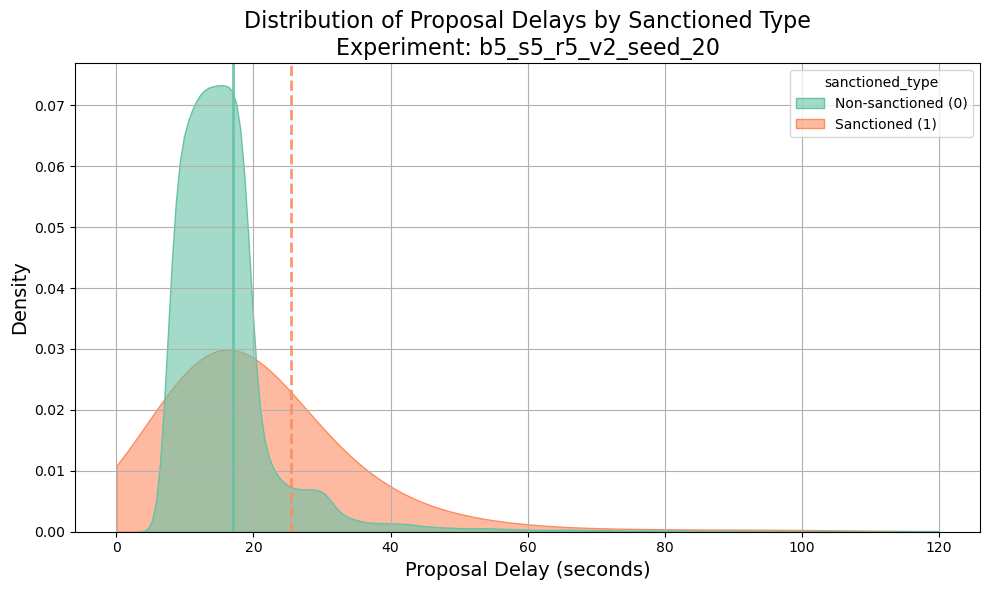

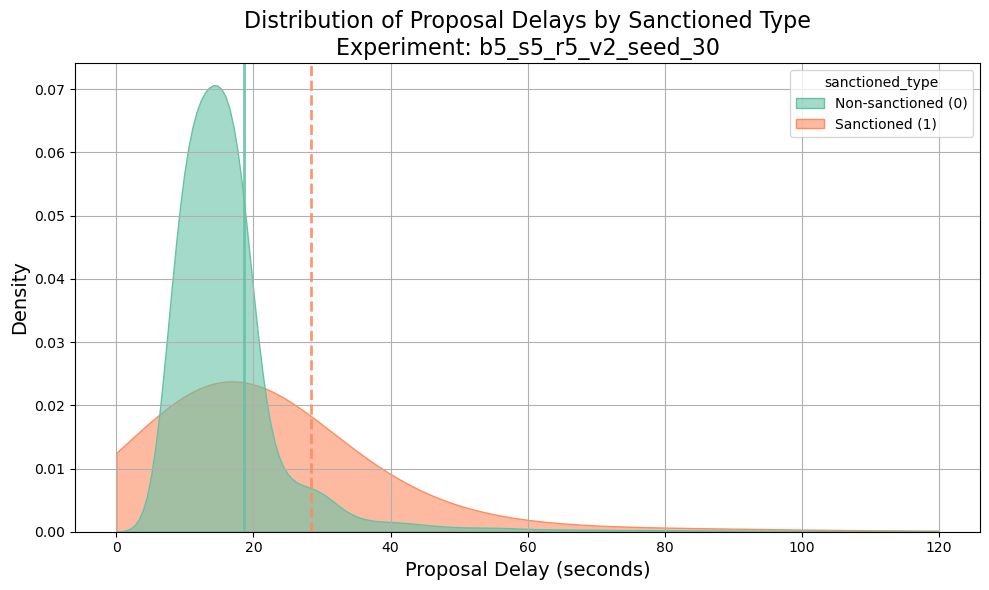

In [5]:

color_palette = sns.color_palette("Set2")
colors = {
    'Non-sanctioned (0)': color_palette[0],
    'Sanctioned (1)': color_palette[1]
}

linestyles = {
    'Non-sanctioned (0)': 'solid',
    'Sanctioned (1)': 'dashed'
}

for exp in combined_transactions['experiment'].unique():
    plt.figure(figsize=(10, 6))
    subset_data = combined_transactions[combined_transactions['experiment'] == exp]

    # KDE plot
    sns.kdeplot(
        data=subset_data,
        x='proposal_delay',
        hue='sanctioned_type',
        fill=True,
        common_norm=False,
        palette=colors,
        alpha=0.6,
        clip=(0, 120)
    )

    # Add vertical lines for the mean
    for stype in subset_data['sanctioned_type'].unique():
        mean_value = final_stats[
            (final_stats['experiment'] == exp) & 
            (final_stats['sanctioned_type'] == stype)
        ]['mean'].values[0]

        plt.axvline(
            mean_value,
            linestyle=linestyles[stype],
            linewidth=2,
            color=colors[stype],
            alpha=0.9 
        )

    plt.xlabel('Proposal Delay (seconds)', fontsize=14)
    plt.ylabel('Density', fontsize=14)
    plt.title(f'Distribution of Proposal Delays by Sanctioned Type\nExperiment: {exp}', fontsize=16)
    plt.grid(True)

    plt.tight_layout()
    plt.show()


In [6]:
# Load the first dataset
file_path1 = "simulation_results_validation_0606/baseline_b5_s5_r5_v2_uniform_start_seed_40_20250622_141724/transactions.csv"
transactions1 = pd.read_csv(file_path1)
transactions1 = transactions1[transactions1['is_proposed']].copy()
transactions1['proposal_delay'] = transactions1['proposed_time'] - transactions1['arrival_time']
transactions1['sanctioned_type'] = transactions1['sanctioned_type'].map({0: 'Non-sanctioned (0)', 1: 'Sanctioned (1)'})
transactions1['experiment'] = 'b5_s5_r5_v2_seed_40'

#  Load the second dataset
file_path2 = "simulation_results_validation_0606/baseline_b5_s5_r5_v2_uniform_start_seed_50_20250622_143117/transactions.csv"
transactions2 = pd.read_csv(file_path2)
transactions2 = transactions2[transactions2['is_proposed']].copy()
transactions2['proposal_delay'] = transactions2['proposed_time'] - transactions2['arrival_time']
transactions2['sanctioned_type'] = transactions2['sanctioned_type'].map({0: 'Non-sanctioned (0)', 1: 'Sanctioned (1)'})
transactions2['experiment'] = 'b5_s5_r5_v2_seed_50'

# Combine the two datasets
combined_transactions = pd.concat([transactions1, transactions2], ignore_index=True)

# Check for negative proposal delays
negative_delay_txs = combined_transactions[combined_transactions['proposal_delay'] < 0]
print("Transactions with negative proposal delay:")
print(negative_delay_txs)

# Average within each run first, then average across runs
# Step 1: Compute mean and standard deviation for each run, experiment, and sanctioned type
run_stats = combined_transactions.groupby(['experiment', 'run_id', 'sanctioned_type'])['proposal_delay'].agg(['mean', 'std']).reset_index()

# Step 2: Compute the average of the means and stds across runs, for each experiment and sanctioned type
final_stats = run_stats.groupby(['experiment', 'sanctioned_type']).agg({
    'mean': 'mean',
    'std': 'mean'
}).reset_index()

print("Proposal Delay Statistics by Experiment and Sanctioned Type (averaged by run_id):")
print(final_stats)


Transactions with negative proposal delay:
Empty DataFrame
Columns: [run_id, tx_id, arrival_time, transaction_type, sanctioned_type, gas_used, base_fee_per_gas, priority_fee_per_gas, priority_fee, gas_fee, proposed_block_id, proposed_builder_id, proposed_builder_policy, selected_relay_id, selected_relay_policy, proposer_validator_id, proposer_validator_is_censoring, proposed_time, confirmed_time, is_proposed, is_confirmed, proposal_delay, experiment]
Index: []

[0 rows x 23 columns]
Proposal Delay Statistics by Experiment and Sanctioned Type (averaged by run_id):
            experiment     sanctioned_type       mean        std
0  b5_s5_r5_v2_seed_40  Non-sanctioned (0)  18.557704  24.897005
1  b5_s5_r5_v2_seed_40      Sanctioned (1)  28.747712  56.586663
2  b5_s5_r5_v2_seed_50  Non-sanctioned (0)  18.630792  26.718266
3  b5_s5_r5_v2_seed_50      Sanctioned (1)  30.451329  58.945518


#### Variation in the Number of TC Transactions in Proposed Blocks

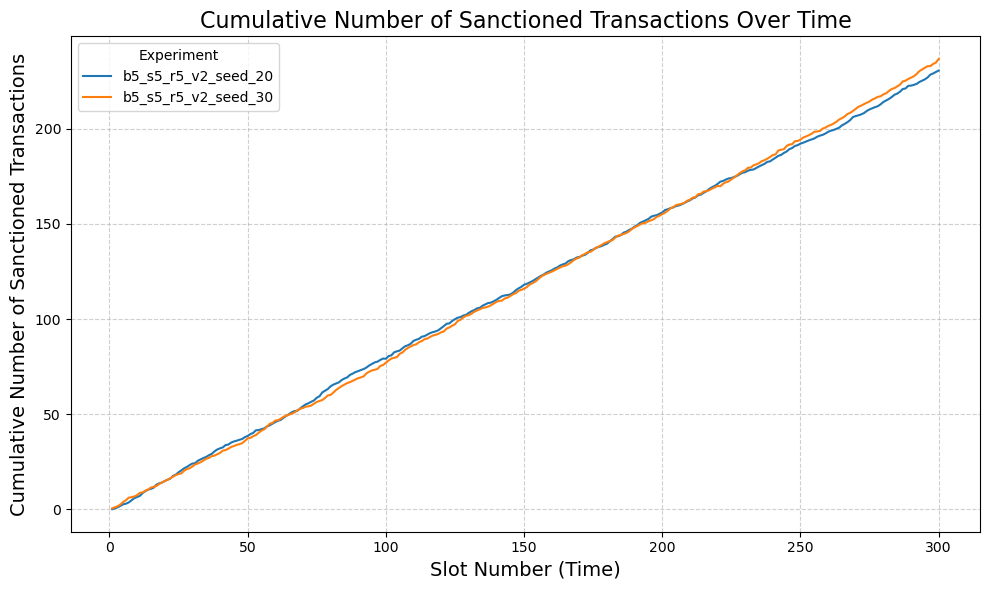

In [7]:

# Function to load and process block data
def load_blocks(filepath, experiment_label):
    df = pd.read_csv(filepath)
    df = df[(df['is_proposed']) & (df['builder_id'] != 'PROPOSER')].copy()
    df['slot_no'] = df['slot_no'].astype(int)
    df['num_sanctioned_tx'] = df['num_sanctioned_tx'].fillna(0).astype(int)
    df['experiment'] = experiment_label
    return df

# 加Load block data from two experiments
blocks1 = load_blocks(
    "simulation_results_validation_0606/baseline_b5_s5_r5_v2_uniform_start_seed_20_20250622_113308/blocks.csv",
    'b5_s5_r5_v2_seed_20'
)

blocks2 = load_blocks(
    "simulation_results_validation_0606/baseline_b5_s5_r5_v2_uniform_start_seed_30_20250622_114252/blocks.csv",
    'b5_s5_r5_v2_seed_30'
)

# Combine datasets
combined_blocks = pd.concat([blocks1, blocks2], ignore_index=True)

# 每For each experiment, run_id, and slot_no, calculate cumulative number of TC (sanctioned) transactions
combined_blocks.sort_values(['experiment', 'run_id', 'slot_no'], inplace=True)
combined_blocks['cum_sanctioned_tx'] = combined_blocks.groupby(['experiment', 'run_id'])['num_sanctioned_tx'].cumsum()

# Compute the average cumulative value across different runs
avg_cum_tx = combined_blocks.groupby(['experiment', 'slot_no'])['cum_sanctioned_tx'].mean().reset_index()

# Plot the cumulative number of TC (sanctioned) transactions over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_cum_tx, x='slot_no', y='cum_sanctioned_tx', hue='experiment')

plt.xlabel('Slot Number (Time)', fontsize=14)
plt.ylabel('Cumulative Number of Sanctioned Transactions', fontsize=14)
plt.title('Cumulative Number of Sanctioned Transactions Over Time', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Experiment')
plt.tight_layout()
plt.show()


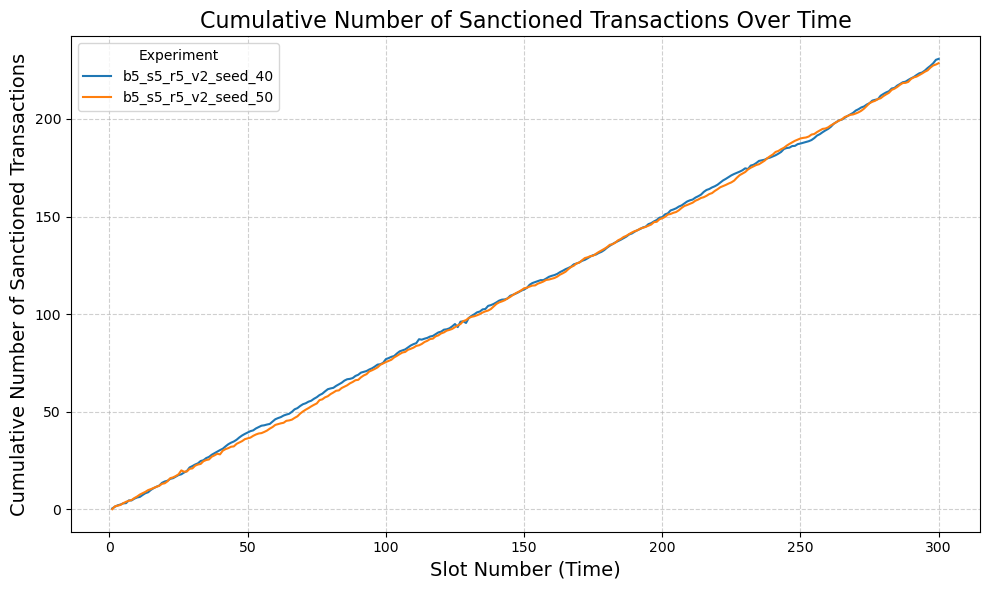

In [8]:

# Function to load and process block data
def load_blocks(filepath, experiment_label):
    df = pd.read_csv(filepath)
    df = df[(df['is_proposed']) & (df['builder_id'] != 'PROPOSER')].copy()
    df['slot_no'] = df['slot_no'].astype(int)
    df['num_sanctioned_tx'] = df['num_sanctioned_tx'].fillna(0).astype(int)
    df['experiment'] = experiment_label
    return df

# Load block data from two experiments
blocks1 = load_blocks(
    "simulation_results_validation_0606/baseline_b5_s5_r5_v2_uniform_start_seed_40_20250622_141724/blocks.csv",
    'b5_s5_r5_v2_seed_40'
)

blocks2 = load_blocks(
    "simulation_results_validation_0606/baseline_b5_s5_r5_v2_uniform_start_seed_50_20250622_143117/blocks.csv",
    'b5_s5_r5_v2_seed_50'
)

# Combine datasets
combined_blocks = pd.concat([blocks1, blocks2], ignore_index=True)

# For each experiment, run_id, and slot_no, calculate cumulative number of TC (sanctioned) transactions
combined_blocks.sort_values(['experiment', 'run_id', 'slot_no'], inplace=True)
combined_blocks['cum_sanctioned_tx'] = combined_blocks.groupby(['experiment', 'run_id'])['num_sanctioned_tx'].cumsum()

# Compute the average cumulative value across different runs
avg_cum_tx = combined_blocks.groupby(['experiment', 'slot_no'])['cum_sanctioned_tx'].mean().reset_index()

# Plot the cumulative number of TC (sanctioned) transactions over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_cum_tx, x='slot_no', y='cum_sanctioned_tx', hue='experiment')

plt.xlabel('Slot Number (Time)', fontsize=14)
plt.ylabel('Cumulative Number of Sanctioned Transactions', fontsize=14)
plt.title('Cumulative Number of Sanctioned Transactions Over Time', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Experiment')
plt.tight_layout()
plt.show()


#### Block-Level Analysis – Number/Proportion of Blocks Containing TC Transactions (Excluding Empty Blocks)

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset 1
file_path1 = "simulation_results_validation_0606/baseline_b5_s5_r5_v2_uniform_start_seed_20_20250622_113308/blocks.csv"
blocks1 = pd.read_csv(file_path1)
blocks1 = blocks1[(blocks1['is_proposed']) & (blocks1['builder_id'] != 'PROPOSER')].copy()
blocks1['builder_id'] = blocks1['builder_id'].astype(int)
blocks1['selected_relay_id'] = blocks1['selected_relay_id'].astype('Int64')
blocks1['proposer_validator_id'] = blocks1['proposer_validator_id'].astype('Int64')
blocks1['contains_sanctioned'] = blocks1['num_sanctioned_tx'] > 0
blocks1['experiment'] = 'b5_s5_r5_v2_seed_20'


# Load Dataset 2
file_path2 = "simulation_results_validation_0606/baseline_b5_s5_r5_v2_uniform_start_seed_30_20250622_114252/blocks.csv"
blocks2 = pd.read_csv(file_path2)
blocks2 = blocks2[(blocks2['is_proposed']) & (blocks2['builder_id'] != 'PROPOSER')].copy()
blocks2['builder_id'] = blocks2['builder_id'].astype(int)
blocks2['selected_relay_id'] = blocks2['selected_relay_id'].astype('Int64')
blocks2['proposer_validator_id'] = blocks2['proposer_validator_id'].astype('Int64')
blocks2['contains_sanctioned'] = blocks2['num_sanctioned_tx'] > 0
blocks2['experiment'] = 'b5_s5_r5_v2_seed_30'


# Merge the two datasets
combined_blocks = pd.concat([blocks1, blocks2], ignore_index=True)

# For each builder in each run, calculate statistics on block content
def get_builder_stats(exp_blocks, total_runs):
    builder_run_stats = exp_blocks.groupby(['run_id', 'builder_id'])['contains_sanctioned'].agg([
        ('blocks_with_sanctioned_transactions', 'sum'),
        ('blocks_without_sanctioned_transactions', lambda x: (~x).sum()),
        ('total_blocks', 'count')
    ]).reset_index()

    all_builder_ids = exp_blocks['builder_id'].unique()
    all_run_ids = exp_blocks['run_id'].unique()
    full_index = pd.MultiIndex.from_product([all_run_ids, all_builder_ids], names=['run_id', 'builder_id'])
    builder_run_stats = builder_run_stats.set_index(['run_id', 'builder_id']).reindex(full_index, fill_value=0).reset_index()

    mean_builder_stats = builder_run_stats.groupby('builder_id')[['blocks_with_sanctioned_transactions', 'blocks_without_sanctioned_transactions', 'total_blocks']].sum() / total_runs
    return mean_builder_stats.reset_index()

# Generate statistics for each experiment
stats1 = get_builder_stats(blocks1, blocks1['run_id'].nunique())
stats1['experiment'] = 'b5_s5_r5_v2_seed_20'
stats2 = get_builder_stats(blocks2, blocks2['run_id'].nunique())
stats2['experiment'] = 'b5_s5_r5_v2_seed_30'

# Combine statistics for comparison
combined_stats = pd.concat([stats1, stats2])

for exp, data in [('b5_s5_r5_v2_seed_20', blocks1), ('b5_s5_r5_v2_seed_30', blocks2)]:
    run_summary = data.groupby('run_id').agg(
        total_blocks_with_sanctioned=('contains_sanctioned', 'sum'),
        total_blocks=('block_id', 'count')
    ).reset_index()

    run_summary['blocks_without_sanctioned'] = run_summary['total_blocks'] - run_summary['total_blocks_with_sanctioned']
    run_summary['ratio_with_sanctioned'] = run_summary['total_blocks_with_sanctioned'] / run_summary['total_blocks']
    run_summary['ratio_without_sanctioned'] = run_summary['blocks_without_sanctioned'] / run_summary['total_blocks']

    avg_blocks_with_sanctioned = run_summary['total_blocks_with_sanctioned'].mean()
    avg_blocks_without_sanctioned = run_summary['blocks_without_sanctioned'].mean()
    avg_total_blocks = run_summary['total_blocks'].mean()
    avg_ratio_with_sanctioned = run_summary['ratio_with_sanctioned'].mean()
    avg_ratio_without_sanctioned = run_summary['ratio_without_sanctioned'].mean()

    print(f"\nExperiment: {exp}")
    print(f"Average number of blocks containing sanctioned_type=1 transactions: {avg_blocks_with_sanctioned:.6f}")
    print(f"verage number of blocks not containing sanctioned_type=1 transactions (excluding empty blocks): {avg_blocks_without_sanctioned:.6f}")
    print(f"Proportion of blocks with sanctioned_type=1 transactions among all proposed non-empty blocks: {avg_ratio_with_sanctioned:.2%}")
    print(f"roportion of blocks without sanctioned_type=1 transactions among all proposed non-empty blocks: {avg_ratio_without_sanctioned:.2%}")





Experiment: b5_s5_r5_v2_seed_20
Average number of blocks containing sanctioned_type=1 transactions: 140.200000
verage number of blocks not containing sanctioned_type=1 transactions (excluding empty blocks): 159.600000
Proportion of blocks with sanctioned_type=1 transactions among all proposed non-empty blocks: 46.77%
roportion of blocks without sanctioned_type=1 transactions among all proposed non-empty blocks: 53.23%

Experiment: b5_s5_r5_v2_seed_30
Average number of blocks containing sanctioned_type=1 transactions: 140.100000
verage number of blocks not containing sanctioned_type=1 transactions (excluding empty blocks): 159.200000
Proportion of blocks with sanctioned_type=1 transactions among all proposed non-empty blocks: 46.81%
roportion of blocks without sanctioned_type=1 transactions among all proposed non-empty blocks: 53.19%


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset 1
file_path1 = "simulation_results_validation_0606/baseline_b5_s5_r5_v2_uniform_start_seed_40_20250622_141724/blocks.csv"
blocks1 = pd.read_csv(file_path1)
blocks1 = blocks1[(blocks1['is_proposed']) & (blocks1['builder_id'] != 'PROPOSER')].copy()
blocks1['builder_id'] = blocks1['builder_id'].astype(int)
blocks1['selected_relay_id'] = blocks1['selected_relay_id'].astype('Int64')
blocks1['proposer_validator_id'] = blocks1['proposer_validator_id'].astype('Int64')
blocks1['contains_sanctioned'] = blocks1['num_sanctioned_tx'] > 0
blocks1['experiment'] = 'b5_s5_r5_v2_seed_40'


# Load Dataset 2
file_path2 = "simulation_results_validation_0606/baseline_b5_s5_r5_v2_uniform_start_seed_50_20250622_143117/blocks.csv"
blocks2 = pd.read_csv(file_path2)
blocks2 = blocks2[(blocks2['is_proposed']) & (blocks2['builder_id'] != 'PROPOSER')].copy()
blocks2['builder_id'] = blocks2['builder_id'].astype(int)
blocks2['selected_relay_id'] = blocks2['selected_relay_id'].astype('Int64')
blocks2['proposer_validator_id'] = blocks2['proposer_validator_id'].astype('Int64')
blocks2['contains_sanctioned'] = blocks2['num_sanctioned_tx'] > 0
blocks2['experiment'] = 'b5_s5_r5_v2_seed_50'


# Merge the two datasets
combined_blocks = pd.concat([blocks1, blocks2], ignore_index=True)

# For each builder in each run, calculate statistics on block content
def get_builder_stats(exp_blocks, total_runs):
    builder_run_stats = exp_blocks.groupby(['run_id', 'builder_id'])['contains_sanctioned'].agg([
        ('blocks_with_sanctioned_transactions', 'sum'),
        ('blocks_without_sanctioned_transactions', lambda x: (~x).sum()),
        ('total_blocks', 'count')
    ]).reset_index()

    all_builder_ids = exp_blocks['builder_id'].unique()
    all_run_ids = exp_blocks['run_id'].unique()
    full_index = pd.MultiIndex.from_product([all_run_ids, all_builder_ids], names=['run_id', 'builder_id'])
    builder_run_stats = builder_run_stats.set_index(['run_id', 'builder_id']).reindex(full_index, fill_value=0).reset_index()

    mean_builder_stats = builder_run_stats.groupby('builder_id')[['blocks_with_sanctioned_transactions', 'blocks_without_sanctioned_transactions', 'total_blocks']].sum() / total_runs
    return mean_builder_stats.reset_index()

# Generate statistics for each experiment
stats1 = get_builder_stats(blocks1, blocks1['run_id'].nunique())
stats1['experiment'] = 'b5_s5_r5_v2_seed_40'
stats2 = get_builder_stats(blocks2, blocks2['run_id'].nunique())
stats2['experiment'] = 'b5_s5_r5_v2_seed_50'

# Combine statistics for comparison
combined_stats = pd.concat([stats1, stats2])

for exp, data in [('b5_s5_r5_v2_seed_40', blocks1), ('b5_s5_r5_v2_seed_50', blocks2)]:
    run_summary = data.groupby('run_id').agg(
        total_blocks_with_sanctioned=('contains_sanctioned', 'sum'),
        total_blocks=('block_id', 'count')
    ).reset_index()

    run_summary['blocks_without_sanctioned'] = run_summary['total_blocks'] - run_summary['total_blocks_with_sanctioned']
    run_summary['ratio_with_sanctioned'] = run_summary['total_blocks_with_sanctioned'] / run_summary['total_blocks']
    run_summary['ratio_without_sanctioned'] = run_summary['blocks_without_sanctioned'] / run_summary['total_blocks']

    avg_blocks_with_sanctioned = run_summary['total_blocks_with_sanctioned'].mean()
    avg_blocks_without_sanctioned = run_summary['blocks_without_sanctioned'].mean()
    avg_total_blocks = run_summary['total_blocks'].mean()
    avg_ratio_with_sanctioned = run_summary['ratio_with_sanctioned'].mean()
    avg_ratio_without_sanctioned = run_summary['ratio_without_sanctioned'].mean()

    print(f"\nExperiment: {exp}")
    print(f"Average number of blocks containing sanctioned_type=1 transactions: {avg_blocks_with_sanctioned:.6f}")
    print(f"Average number of blocks not containing sanctioned_type=1 transactions (excluding empty blocks): {avg_blocks_without_sanctioned:.6f}")
    print(f"Proportion of blocks with sanctioned_type=1 transactions among all proposed non-empty blocks: {avg_ratio_with_sanctioned:.2%}")
    print(f"Proportion of blocks without sanctioned_type=1 transactions among all proposed non-empty blocks: {avg_ratio_without_sanctioned:.2%}")





Experiment: b5_s5_r5_v2_seed_40
Average number of blocks containing sanctioned_type=1 transactions: 141.100000
Average number of blocks not containing sanctioned_type=1 transactions (excluding empty blocks): 158.200000
Proportion of blocks with sanctioned_type=1 transactions among all proposed non-empty blocks: 47.14%
Proportion of blocks without sanctioned_type=1 transactions among all proposed non-empty blocks: 52.86%

Experiment: b5_s5_r5_v2_seed_50
Average number of blocks containing sanctioned_type=1 transactions: 138.500000
Average number of blocks not containing sanctioned_type=1 transactions (excluding empty blocks): 160.500000
Proportion of blocks with sanctioned_type=1 transactions among all proposed non-empty blocks: 46.32%
Proportion of blocks without sanctioned_type=1 transactions among all proposed non-empty blocks: 53.68%


#### Block Value

Average total block value per run (ETH):
            experiment  total_priority_fee
0  b5_s5_r5_v2_seed_20           11.880267
1  b5_s5_r5_v2_seed_30           11.925219


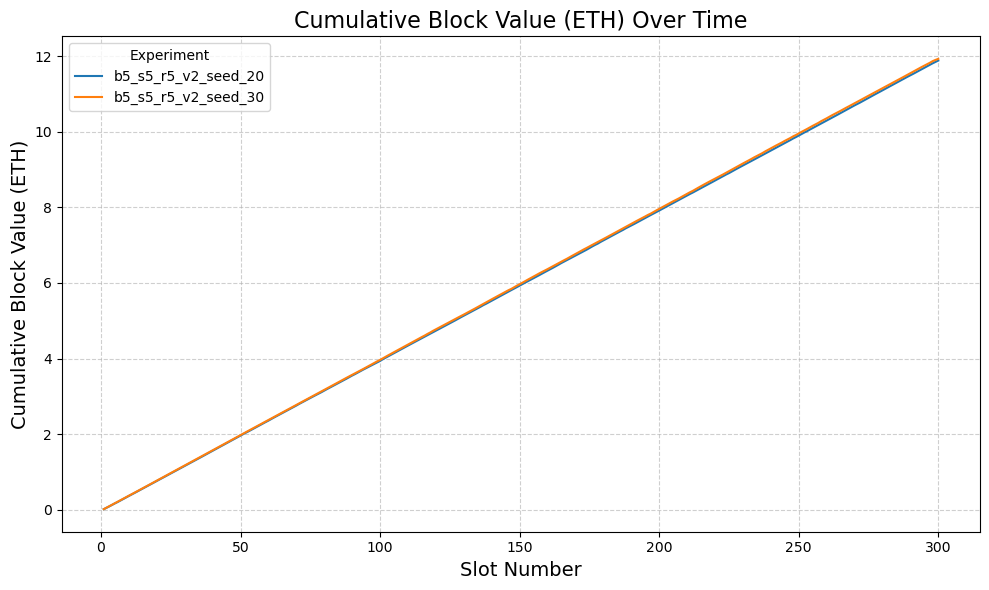

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load and preprocess the blocks.csv data
def load_blocks(filepath, experiment_label):
    df = pd.read_csv(filepath)
    df = df[df['is_proposed']].copy()     # All proposed blocks (including empty blocks)
    df['slot_no'] = df['slot_no'].astype(int)
    df['experiment'] = experiment_label
    # Standardize builder_id, relay_id, and validator_id as string type and strip whitespace
    df['builder_id'] = df['builder_id'].astype(str).str.strip()
    df['selected_relay_id'] = df['selected_relay_id'].astype(str).str.strip()
    df['proposer_validator_id'] = df['proposer_validator_id'].astype(str).str.strip()
    
    return df


# Load block data from two experiments
blocks1 = load_blocks(
    "simulation_results_validation_0606/baseline_b5_s5_r5_v2_uniform_start_seed_20_20250622_113308/blocks.csv",
    'b5_s5_r5_v2_seed_20'
)

blocks2 = load_blocks(
    "simulation_results_validation_0606/baseline_b5_s5_r5_v2_uniform_start_seed_30_20250622_114252/blocks.csv",
    'b5_s5_r5_v2_seed_30'
)

# Merge the two datasets
combined_blocks = pd.concat([blocks1, blocks2], ignore_index=True)

# Calculate and print the total value of all proposed blocks (in ETH) for both experiments
total_values_eth = combined_blocks.groupby(['experiment', 'run_id'])['total_priority_fee'].sum().div(1e9).groupby('experiment').mean().reset_index()
print("Average total block value per run (ETH):")
print(total_values_eth)

# Compute cumulative value per run_id and slot_no, and convert to ETH
combined_blocks.sort_values(['experiment', 'run_id', 'slot_no'], inplace=True)
combined_blocks['cum_priority_fee_eth'] = combined_blocks.groupby(['experiment', 'run_id'])['total_priority_fee'].cumsum() / 1e9

# For each experiment and slot, compute the average cumulative value across runs (in ETH)
avg_cum_values = combined_blocks.groupby(['experiment', 'slot_no'])['cum_priority_fee_eth'].mean().reset_index()

# Plot the trend of cumulative block value over slot_no (in ETH)
plt.figure(figsize=(10, 6))
for experiment_label, group in avg_cum_values.groupby('experiment'):
    plt.plot(group['slot_no'], group['cum_priority_fee_eth'], label=experiment_label)

plt.xlabel('Slot Number', fontsize=14)
plt.ylabel('Cumulative Block Value (ETH)', fontsize=14)
plt.title('Cumulative Block Value (ETH) Over Time', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Experiment')
plt.tight_layout()
plt.show()


Average total block value per run (ETH):
            experiment  total_priority_fee
0  b5_s5_r5_v2_seed_40           11.906146
1  b5_s5_r5_v2_seed_50           11.915979


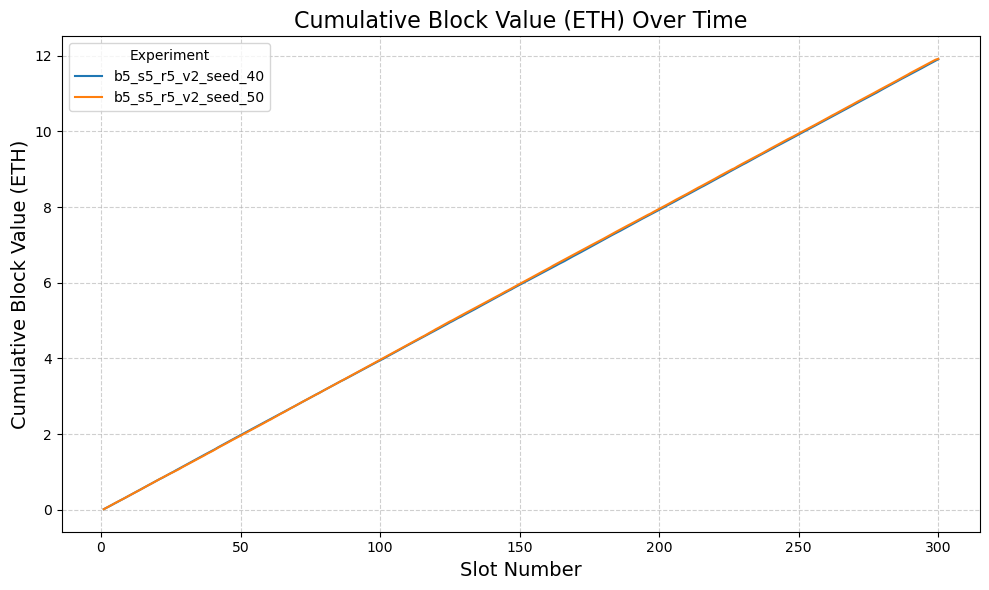

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load and preprocess the blocks.csv data
def load_blocks(filepath, experiment_label):
    df = pd.read_csv(filepath)
    df = df[df['is_proposed']].copy()     # All proposed blocks (including empty blocks)
    df['slot_no'] = df['slot_no'].astype(int)
    df['experiment'] = experiment_label
    # Standardize builder_id, relay_id, and validator_id as string type and strip whitespace
    df['builder_id'] = df['builder_id'].astype(str).str.strip()
    df['selected_relay_id'] = df['selected_relay_id'].astype(str).str.strip()
    df['proposer_validator_id'] = df['proposer_validator_id'].astype(str).str.strip()
    
    return df


# Load block data from two experiments
blocks1 = load_blocks(
    "simulation_results_validation_0606/baseline_b5_s5_r5_v2_uniform_start_seed_40_20250622_141724/blocks.csv",
    'b5_s5_r5_v2_seed_40'
)

blocks2 = load_blocks(
    "simulation_results_validation_0606/baseline_b5_s5_r5_v2_uniform_start_seed_50_20250622_143117/blocks.csv",
    'b5_s5_r5_v2_seed_50'
)

# Merge the two datasets
combined_blocks = pd.concat([blocks1, blocks2], ignore_index=True)

# Calculate and print the total value of all proposed blocks (in ETH) for both experiments
total_values_eth = combined_blocks.groupby(['experiment', 'run_id'])['total_priority_fee'].sum().div(1e9).groupby('experiment').mean().reset_index()
print("Average total block value per run (ETH):")
print(total_values_eth)

# Compute cumulative value per run_id and slot_no, and convert to ETH
combined_blocks.sort_values(['experiment', 'run_id', 'slot_no'], inplace=True)
combined_blocks['cum_priority_fee_eth'] = combined_blocks.groupby(['experiment', 'run_id'])['total_priority_fee'].cumsum() / 1e9

# For each experiment and slot, compute the average cumulative value across runs (in ETH)
avg_cum_values = combined_blocks.groupby(['experiment', 'slot_no'])['cum_priority_fee_eth'].mean().reset_index()

# Plot the trend of cumulative block value over slot_no (in ETH)
plt.figure(figsize=(10, 6))
for experiment_label, group in avg_cum_values.groupby('experiment'):
    plt.plot(group['slot_no'], group['cum_priority_fee_eth'], label=experiment_label)

plt.xlabel('Slot Number', fontsize=14)
plt.ylabel('Cumulative Block Value (ETH)', fontsize=14)
plt.title('Cumulative Block Value (ETH) Over Time', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Experiment')
plt.tight_layout()
plt.show()


## Profit


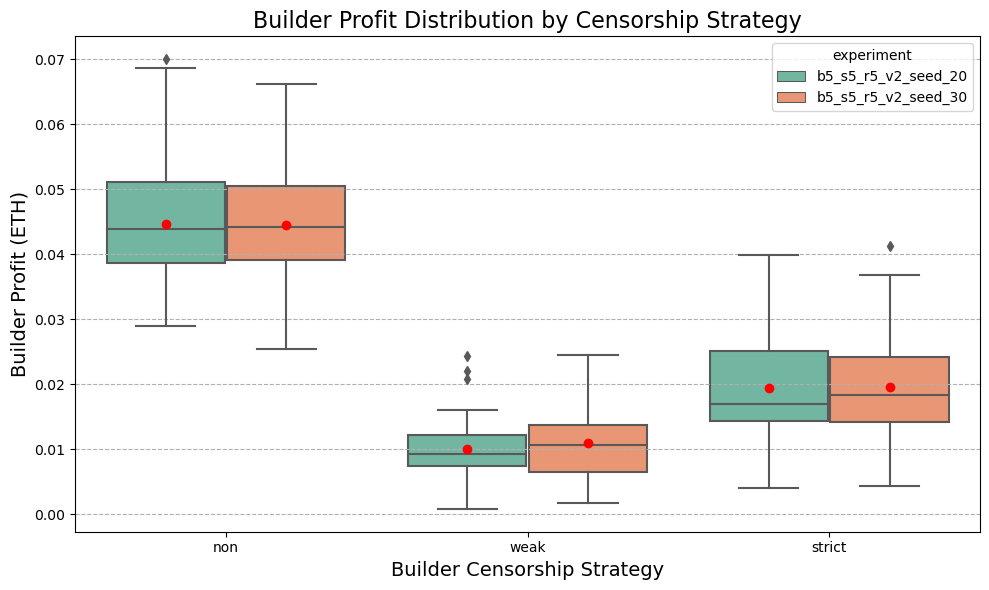

experiment           builder_policy
b5_s5_r5_v2_seed_20  non               0.044638
                     strict            0.019441
                     weak              0.010086
b5_s5_r5_v2_seed_30  non               0.044432
                     strict            0.019609
                     weak              0.011000
Name: builder_profit, dtype: float64


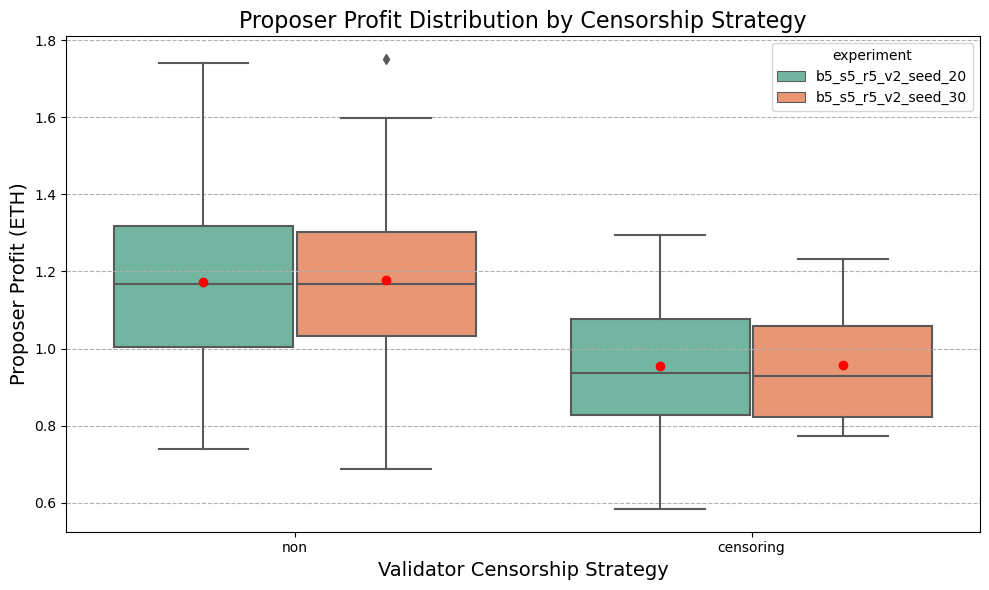

experiment           proposer_validator_policy
b5_s5_r5_v2_seed_20  censoring                    0.955672
                     non                          1.171864
b5_s5_r5_v2_seed_30  censoring                    0.957318
                     non                          1.176790
Name: proposer_profit, dtype: float64


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


def load_blocks(filepath, tag=None):
    df = pd.read_csv(filepath)
    df = df[(df['is_proposed']) & (df['builder_id'] != 'PROPOSER')].copy()
    
    df['builder_id'] = df['builder_id'].astype(str).str.strip()
    df['selected_relay_id'] = df['selected_relay_id'].astype(str).str.strip()
    df['proposer_validator_id'] = df['proposer_validator_id'].astype(str).str.strip()
    
    if tag is not None:
        df['experiment'] = tag
    
    return df

# Load data from two experiments for comparison
blocks1 = load_blocks(
    "simulation_results_validation_0606/baseline_b5_s5_r5_v2_uniform_start_seed_20_20250622_113308/blocks.csv",
    'b5_s5_r5_v2_seed_20'
)
blocks2 = load_blocks(
    "simulation_results_validation_0606/baseline_b5_s5_r5_v2_uniform_start_seed_30_20250622_114252/blocks.csv",
    'b5_s5_r5_v2_seed_30'
)

# Merge both datasets
blocks = pd.concat([blocks1, blocks2], ignore_index=True)
blocks['proposer_validator_policy'] = blocks['proposer_validator_is_censoring'].map({False: 'non', True: 'censoring'})

builder_node_values = blocks.groupby(['experiment', 'run_id', 'builder_id', 'builder_policy'])['builder_profit'].sum().reset_index()
validator_node_values = blocks.groupby(['experiment', 'run_id', 'proposer_validator_id', 'proposer_validator_policy'])['proposer_profit'].sum().reset_index()

builder_policy_order = ['non', 'weak', 'strict']
validator_policy_order = ['non', 'censoring']

# Builder
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=builder_node_values,
    x='builder_policy',
    y=builder_node_values['builder_profit'] * 1e-9,
    hue='experiment',
    order=builder_policy_order,
    palette='Set2',
    showmeans=True,
    meanprops={"marker": "o", "markerfacecolor": "red", "markeredgecolor": "red"}
)
plt.title('Builder Profit Distribution by Censorship Strategy', fontsize=16)
plt.ylabel('Builder Profit (ETH)', fontsize=14)
plt.xlabel('Builder Censorship Strategy', fontsize=14)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

print(builder_node_values.groupby(['experiment', 'builder_policy'])['builder_profit'].mean() * 1e-9)


# Proposer
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=validator_node_values,
    x='proposer_validator_policy',
    y=validator_node_values['proposer_profit'] * 1e-9,
    hue='experiment',
    order=validator_policy_order,
    palette='Set2',
    showmeans=True,
    meanprops={"marker": "o", "markerfacecolor": "red", "markeredgecolor": "red"}
)
plt.title('Proposer Profit Distribution by Censorship Strategy', fontsize=16)
plt.ylabel('Proposer Profit (ETH)', fontsize=14)
plt.xlabel('Validator Censorship Strategy', fontsize=14)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

print(validator_node_values.groupby(['experiment', 'proposer_validator_policy'])['proposer_profit'].mean() * 1e-9)



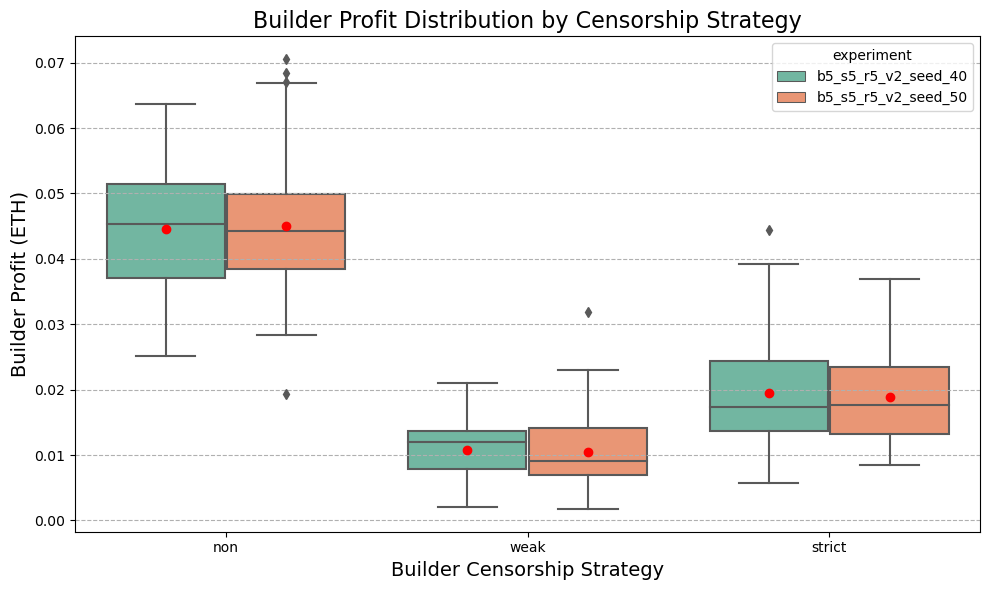

experiment           builder_policy
b5_s5_r5_v2_seed_40  non               0.044571
                     strict            0.019532
                     weak              0.010821
b5_s5_r5_v2_seed_50  non               0.045095
                     strict            0.018919
                     weak              0.010469
Name: builder_profit, dtype: float64


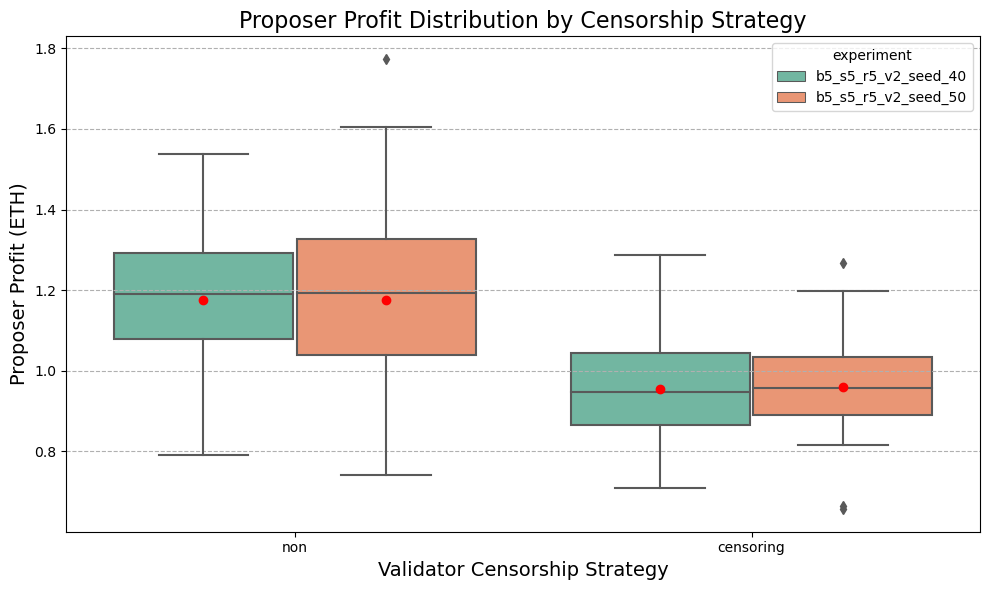

experiment           proposer_validator_policy
b5_s5_r5_v2_seed_40  censoring                    0.954008
                     non                          1.175353
b5_s5_r5_v2_seed_50  censoring                    0.958991
                     non                          1.175275
Name: proposer_profit, dtype: float64


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



def load_blocks(filepath, tag=None):
    df = pd.read_csv(filepath)
    df = df[(df['is_proposed']) & (df['builder_id'] != 'PROPOSER')].copy()
    
    df['builder_id'] = df['builder_id'].astype(str).str.strip()
    df['selected_relay_id'] = df['selected_relay_id'].astype(str).str.strip()
    df['proposer_validator_id'] = df['proposer_validator_id'].astype(str).str.strip()
    
    if tag is not None:
        df['experiment'] = tag
    
    return df

# Load data from two experiments for comparison
blocks1 = load_blocks(
    "simulation_results_validation_0606/baseline_b5_s5_r5_v2_uniform_start_seed_40_20250622_141724/blocks.csv",
    'b5_s5_r5_v2_seed_40'
)
blocks2 = load_blocks(
    "simulation_results_validation_0606/baseline_b5_s5_r5_v2_uniform_start_seed_50_20250622_143117/blocks.csv",
    'b5_s5_r5_v2_seed_50'
)

# Merge both datasets
blocks = pd.concat([blocks1, blocks2], ignore_index=True)
blocks['proposer_validator_policy'] = blocks['proposer_validator_is_censoring'].map({False: 'non', True: 'censoring'})

builder_node_values = blocks.groupby(['experiment', 'run_id', 'builder_id', 'builder_policy'])['builder_profit'].sum().reset_index()
validator_node_values = blocks.groupby(['experiment', 'run_id', 'proposer_validator_id', 'proposer_validator_policy'])['proposer_profit'].sum().reset_index()

builder_policy_order = ['non', 'weak', 'strict']
validator_policy_order = ['non', 'censoring']

# Builder
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=builder_node_values,
    x='builder_policy',
    y=builder_node_values['builder_profit'] * 1e-9,
    hue='experiment',
    order=builder_policy_order,
    palette='Set2',
    showmeans=True,
    meanprops={"marker": "o", "markerfacecolor": "red", "markeredgecolor": "red"}
)
plt.title('Builder Profit Distribution by Censorship Strategy', fontsize=16)
plt.ylabel('Builder Profit (ETH)', fontsize=14)
plt.xlabel('Builder Censorship Strategy', fontsize=14)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

print(builder_node_values.groupby(['experiment', 'builder_policy'])['builder_profit'].mean() * 1e-9)


# Proposer
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=validator_node_values,
    x='proposer_validator_policy',
    y=validator_node_values['proposer_profit'] * 1e-9,
    hue='experiment',
    order=validator_policy_order,
    palette='Set2',
    showmeans=True,
    meanprops={"marker": "o", "markerfacecolor": "red", "markeredgecolor": "red"}
)
plt.title('Proposer Profit Distribution by Censorship Strategy', fontsize=16)
plt.ylabel('Proposer Profit (ETH)', fontsize=14)
plt.xlabel('Validator Censorship Strategy', fontsize=14)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

print(validator_node_values.groupby(['experiment', 'proposer_validator_policy'])['proposer_profit'].mean() * 1e-9)




#### Number and Proportion of Empty Blocks

Average number and ratio of empty blocks per run for each experiment:
            experiment  empty_blocks_count  empty_block_ratio
0  b5_s5_r5_v2_seed_20                 0.2           0.000667
1  b5_s5_r5_v2_seed_30                 0.7           0.002333


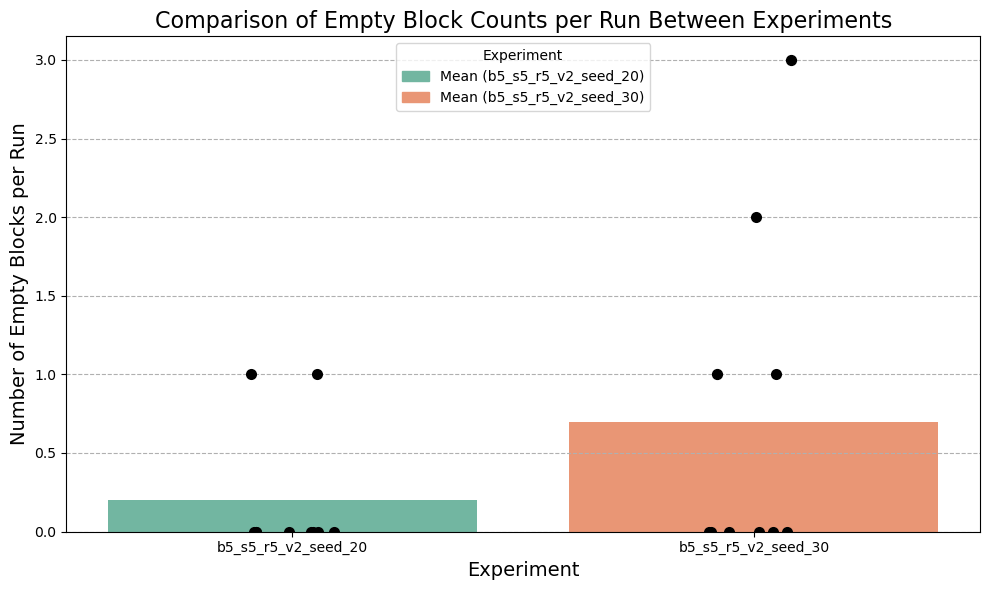


Data used for plotting (combined_counts_ratios):
        run_id  empty_blocks_count  empty_block_ratio           experiment
run_id                                                                    
1            1                   0           0.000000  b5_s5_r5_v2_seed_20
2            2                   0           0.000000  b5_s5_r5_v2_seed_20
3            3                   0           0.000000  b5_s5_r5_v2_seed_20
4            4                   0           0.000000  b5_s5_r5_v2_seed_20
5            5                   0           0.000000  b5_s5_r5_v2_seed_20
6            6                   0           0.000000  b5_s5_r5_v2_seed_20
7            7                   0           0.000000  b5_s5_r5_v2_seed_20
8            8                   1           0.003333  b5_s5_r5_v2_seed_20
9            9                   0           0.000000  b5_s5_r5_v2_seed_20
10          10                   1           0.003333  b5_s5_r5_v2_seed_20
1            1                   2           0.006

In [18]:

import numpy as np
import matplotlib.patches as mpatches

# Load data
blocks1_original = pd.read_csv("simulation_results_validation_0606/baseline_b5_s5_r5_v2_uniform_start_seed_20_20250622_113308/blocks.csv")
blocks2_original = pd.read_csv("simulation_results_validation_0606/baseline_b5_s5_r5_v2_uniform_start_seed_30_20250622_114252/blocks.csv")

# Count and ratio of empty blocks per run
def calculate_empty_block_counts_ratios(blocks, experiment_name):
    all_run_ids = blocks['run_id'].unique()

    empty_blocks_per_run = blocks[blocks['builder_id'] == "PROPOSER"].groupby('run_id').size().reindex(all_run_ids, fill_value=0)
    total_proposed_blocks_per_run = blocks[blocks['is_proposed']].groupby('run_id').size().reindex(all_run_ids, fill_value=0)
    
    empty_block_ratio = empty_blocks_per_run / total_proposed_blocks_per_run

    return pd.DataFrame({
        'run_id': all_run_ids,
        'empty_blocks_count': empty_blocks_per_run,
        'empty_block_ratio': empty_block_ratio,
        'experiment': experiment_name
    })

# Calculate statistics for both experiments
empty_counts_ratios_exp1 = calculate_empty_block_counts_ratios(blocks1_original, 'b5_s5_r5_v2_seed_20')
empty_counts_ratios_exp2 = calculate_empty_block_counts_ratios(blocks2_original, 'b5_s5_r5_v2_seed_30')

# Merge data
combined_counts_ratios = pd.concat([empty_counts_ratios_exp1, empty_counts_ratios_exp2])

# Calculate averages
avg_results = combined_counts_ratios.groupby('experiment').agg({
    'empty_blocks_count': 'mean',
    'empty_block_ratio': 'mean'
}).reset_index()

# Display average empty block count and ratio
print("Average number and ratio of empty blocks per run for each experiment:")
print(avg_results)


plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x='experiment',
    y='empty_blocks_count',
    data=combined_counts_ratios,
    estimator='mean',
    palette='Set2',
    alpha=1.0,
    ci=None
)

x_positions = {'b5_s5_r5_v2_seed_20': 0, 'b5_s5_r5_v2_seed_30': 1}

# Add individual points (stripplot), excluding outliers in selected runs
sns.stripplot(
    x='experiment',
    y='empty_blocks_count',
    data=combined_counts_ratios[~(
        ((combined_counts_ratios['experiment'] == 'b5_s5_r5_v2_seed_30') &
         (combined_counts_ratios['run_id'].isin([8, 10])))
    )],
    color='black',
    size=8,
    jitter=True
)

# Add manually selected outliers as individual points
exp = 'b5_s5_r5_v2_seed_30'
y_8 = combined_counts_ratios.query("experiment == @exp and run_id == 8")['empty_blocks_count'].iloc[0]
y_10 = combined_counts_ratios.query("experiment == @exp and run_id == 10")['empty_blocks_count'].iloc[0]
plt.scatter(
    x=x_positions[exp] - 0.08, y=y_8, color='black', s=50, zorder=10
)
plt.scatter(
    x=x_positions[exp] + 0.08, y=y_10, color='black', s=50, zorder=10
)

plt.ylabel('Number of Empty Blocks per Run', fontsize=14)
plt.xlabel('Experiment', fontsize=14)
plt.title('Comparison of Empty Block Counts per Run Between Experiments', fontsize=16)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()


# Manually add legend to explain the bar colors
bar_colors = [bar.get_facecolor() for bar in ax.patches[:2]]
legend_elements = [
    mpatches.Patch(color=bar_colors[0], label='Mean (b5_s5_r5_v2_seed_20)'),
    mpatches.Patch(color=bar_colors[1], label='Mean (b5_s5_r5_v2_seed_30)')
]
plt.legend(handles=legend_elements, title='Experiment', loc='upper center')

plt.show()


# Print the data used for plotting
print("\nData used for plotting (combined_counts_ratios):")
print(combined_counts_ratios)

Average number and ratio of empty blocks per run for each experiment:
            experiment  empty_blocks_count  empty_block_ratio
0  b5_s5_r5_v2_seed_40                 0.7           0.002333
1  b5_s5_r5_v2_seed_50                 1.0           0.003333


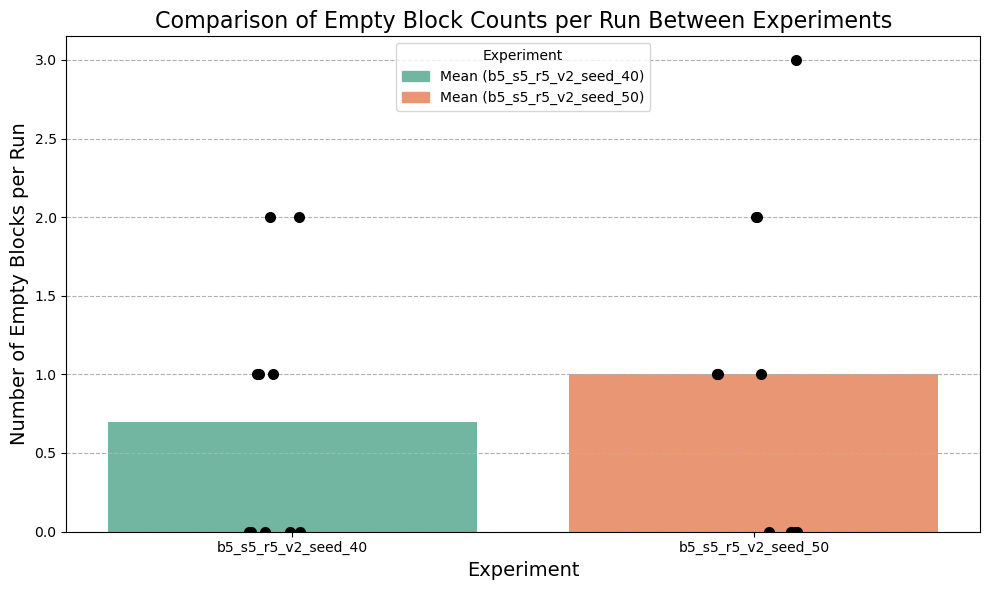


Data used for plotting (combined_counts_ratios):
        run_id  empty_blocks_count  empty_block_ratio           experiment
run_id                                                                    
1            1                   0           0.000000  b5_s5_r5_v2_seed_40
2            2                   1           0.003333  b5_s5_r5_v2_seed_40
3            3                   1           0.003333  b5_s5_r5_v2_seed_40
4            4                   0           0.000000  b5_s5_r5_v2_seed_40
5            5                   2           0.006667  b5_s5_r5_v2_seed_40
6            6                   0           0.000000  b5_s5_r5_v2_seed_40
7            7                   2           0.006667  b5_s5_r5_v2_seed_40
8            8                   1           0.003333  b5_s5_r5_v2_seed_40
9            9                   0           0.000000  b5_s5_r5_v2_seed_40
10          10                   0           0.000000  b5_s5_r5_v2_seed_40
1            1                   0           0.000

In [19]:

import numpy as np
import matplotlib.patches as mpatches

# Load data
blocks1_original = pd.read_csv("simulation_results_validation_0606/baseline_b5_s5_r5_v2_uniform_start_seed_40_20250622_141724/blocks.csv")
blocks2_original = pd.read_csv("simulation_results_validation_0606/baseline_b5_s5_r5_v2_uniform_start_seed_50_20250622_143117/blocks.csv")

# Count and ratio of empty blocks per run
def calculate_empty_block_counts_ratios(blocks, experiment_name):
    all_run_ids = blocks['run_id'].unique()

    empty_blocks_per_run = blocks[blocks['builder_id'] == "PROPOSER"].groupby('run_id').size().reindex(all_run_ids, fill_value=0)
    total_proposed_blocks_per_run = blocks[blocks['is_proposed']].groupby('run_id').size().reindex(all_run_ids, fill_value=0)
    
    empty_block_ratio = empty_blocks_per_run / total_proposed_blocks_per_run

    return pd.DataFrame({
        'run_id': all_run_ids,
        'empty_blocks_count': empty_blocks_per_run,
        'empty_block_ratio': empty_block_ratio,
        'experiment': experiment_name
    })

# Calculate statistics for both experiments
empty_counts_ratios_exp1 = calculate_empty_block_counts_ratios(blocks1_original, 'b5_s5_r5_v2_seed_40')
empty_counts_ratios_exp2 = calculate_empty_block_counts_ratios(blocks2_original, 'b5_s5_r5_v2_seed_50')

# Merge data
combined_counts_ratios = pd.concat([empty_counts_ratios_exp1, empty_counts_ratios_exp2])

# Calculate averages
avg_results = combined_counts_ratios.groupby('experiment').agg({
    'empty_blocks_count': 'mean',
    'empty_block_ratio': 'mean'
}).reset_index()

# Display average empty block count and ratio
print("Average number and ratio of empty blocks per run for each experiment:")
print(avg_results)


plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x='experiment',
    y='empty_blocks_count',
    data=combined_counts_ratios,
    estimator='mean',
    palette='Set2',
    alpha=1.0,
    ci=None
)

x_positions = {'b5_s5_r5_v2_seed_40': 0, 'b5_s5_r5_v2_seed_50': 1}

# Add individual points (stripplot), excluding outliers in selected runs
sns.stripplot(
    x='experiment',
    y='empty_blocks_count',
    data=combined_counts_ratios[~(
        ((combined_counts_ratios['experiment'] == 'b5_s5_r5_v2_seed_50') &
         (combined_counts_ratios['run_id'].isin([8, 10])))
    )],
    color='black',
    size=8,
    jitter=True
)

# Add manually selected outliers as individual points
exp = 'b5_s5_r5_v2_seed_50'
y_8 = combined_counts_ratios.query("experiment == @exp and run_id == 8")['empty_blocks_count'].iloc[0]
y_10 = combined_counts_ratios.query("experiment == @exp and run_id == 10")['empty_blocks_count'].iloc[0]
plt.scatter(
    x=x_positions[exp] - 0.08, y=y_8, color='black', s=50, zorder=10
)
plt.scatter(
    x=x_positions[exp] + 0.08, y=y_10, color='black', s=50, zorder=10
)

plt.ylabel('Number of Empty Blocks per Run', fontsize=14)
plt.xlabel('Experiment', fontsize=14)
plt.title('Comparison of Empty Block Counts per Run Between Experiments', fontsize=16)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()


# Manually add legend to explain the bar colors
bar_colors = [bar.get_facecolor() for bar in ax.patches[:2]]
legend_elements = [
    mpatches.Patch(color=bar_colors[0], label='Mean (b5_s5_r5_v2_seed_40)'),
    mpatches.Patch(color=bar_colors[1], label='Mean (b5_s5_r5_v2_seed_50)')
]
plt.legend(handles=legend_elements, title='Experiment', loc='upper center')

plt.show()


# Print the data used for plotting
print("\nData used for plotting (combined_counts_ratios):")
print(combined_counts_ratios)

In [ ]:
import pandas as pd

# Data for the first table
df1 = pd.DataFrame({
    "Random_seed": [10, 20, 30, 40, 50],
    "avg_delay(non_sanctioned)": [17.16, 17.08, 18.57, 18.56, 18.63],
    "avg_delay(sanctioned)": [29.29, 25.45, 28.38, 28.75, 30.45],
    "Proportion of Sanctioned Blocks": [46.15, 46.77, 46.81, 47.14, 46.32],
    "Total Block Value": [11.91, 11.88, 11.93, 11.91, 11.92],
    "Empty Block Ratio": [0.10, 0.07, 0.23, 0.23, 0.33]
})

# Convert percentage values to decimals by dividing by 100
df1["Proportion of Sanctioned Blocks"] /= 100
df1["Empty Block Ratio"] /= 100

# Data for the second table
df2 = pd.DataFrame({
    "Random_seed": [10, 20, 30, 40, 50],
    "non_censoring_builder_profit": [0.0439, 0.0446, 0.0444, 0.0446, 0.0451],
    "strict_censoring_buidler_profit": [0.0219, 0.0194, 0.0196, 0.0195, 0.0189],
    "weak_censoring_builder_profit": [0.0096, 0.0101, 0.0110, 0.0108, 0.0105],
    "censoring_validator_profit": [0.9352, 0.9557, 0.9573, 0.9540, 0.9590],
    "non_censoring_validator_profit": [1.1802, 1.1719, 1.1768, 1.1754, 1.1753]
})

# Calculate mean and standard deviation
mean_std_df1 = df1.iloc[:, 1:].agg(['mean', 'std'])
mean_std_df2 = df2.iloc[:, 1:].agg(['mean', 'std'])

# Display results
print("Table 1 - Mean and Std:")
print(mean_std_df1)

print("\nTable 2 - Mean and Std:")
print(mean_std_df2)


Table 1 - Mean and Std:
      avg_delay(non_sanctioned)  avg_delay(sanctioned)  \
mean                   18.00000              28.464000   
std                     0.80427               1.857385   

      Proportion of Sanctioned Blocks  Total Block Value  Empty Block Ratio  
mean                         0.466380          11.910000           0.001920  
std                          0.003995           0.018708           0.001064  

Table 2 - Mean and Std:
      non_censoring_builder_profit  strict_censoring_buidler_profit  \
mean                      0.044520                         0.019860   
std                       0.000432                         0.001172   

      weak_censoring_builder_profit  censoring_validator_profit  \
mean                       0.010400                    0.952240   
std                        0.000561                    0.009705   

      non_censoring_validator_profit  
mean                        1.175920  
std                         0.002996  
